Saving Dataset .csv to Dataset .csv


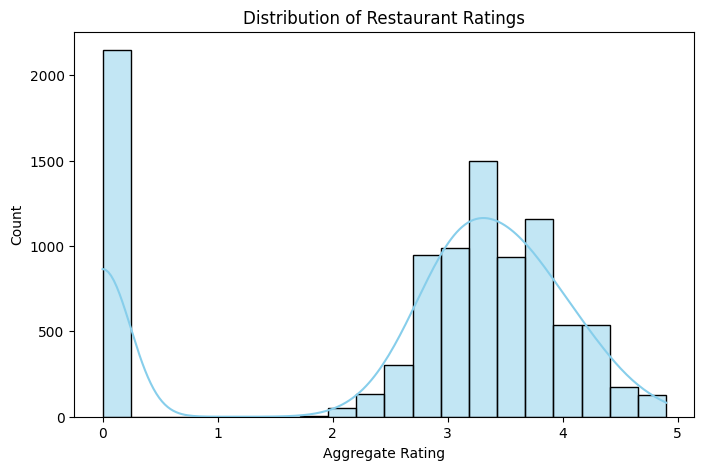

/tmp/ipython-input-1796655410.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='viridis')


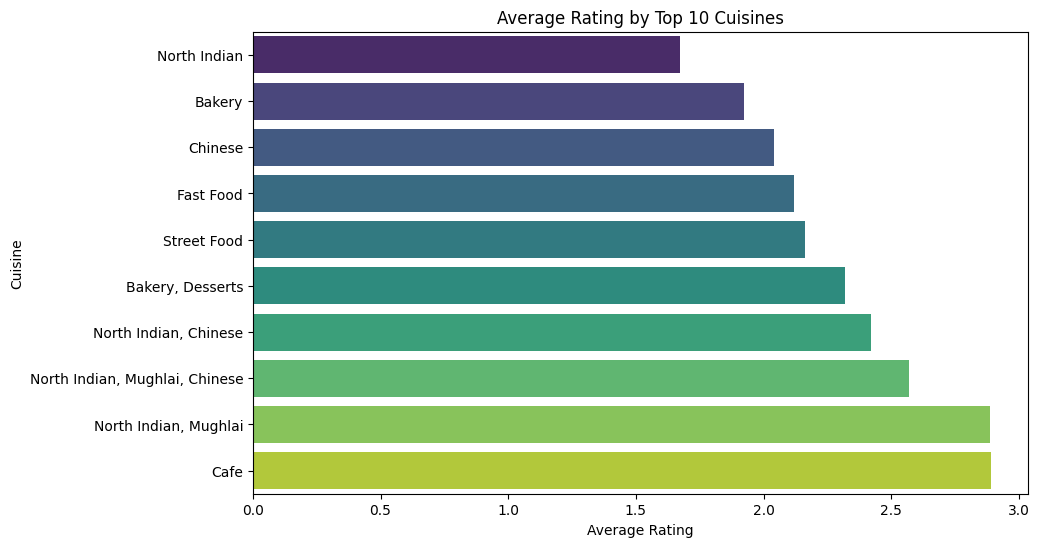

/tmp/ipython-input-1796655410.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='magma')


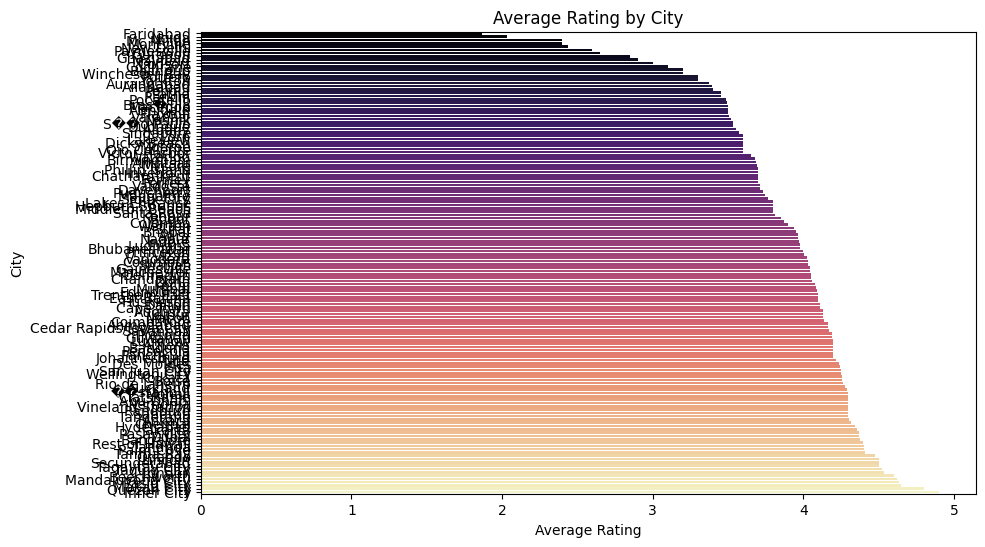

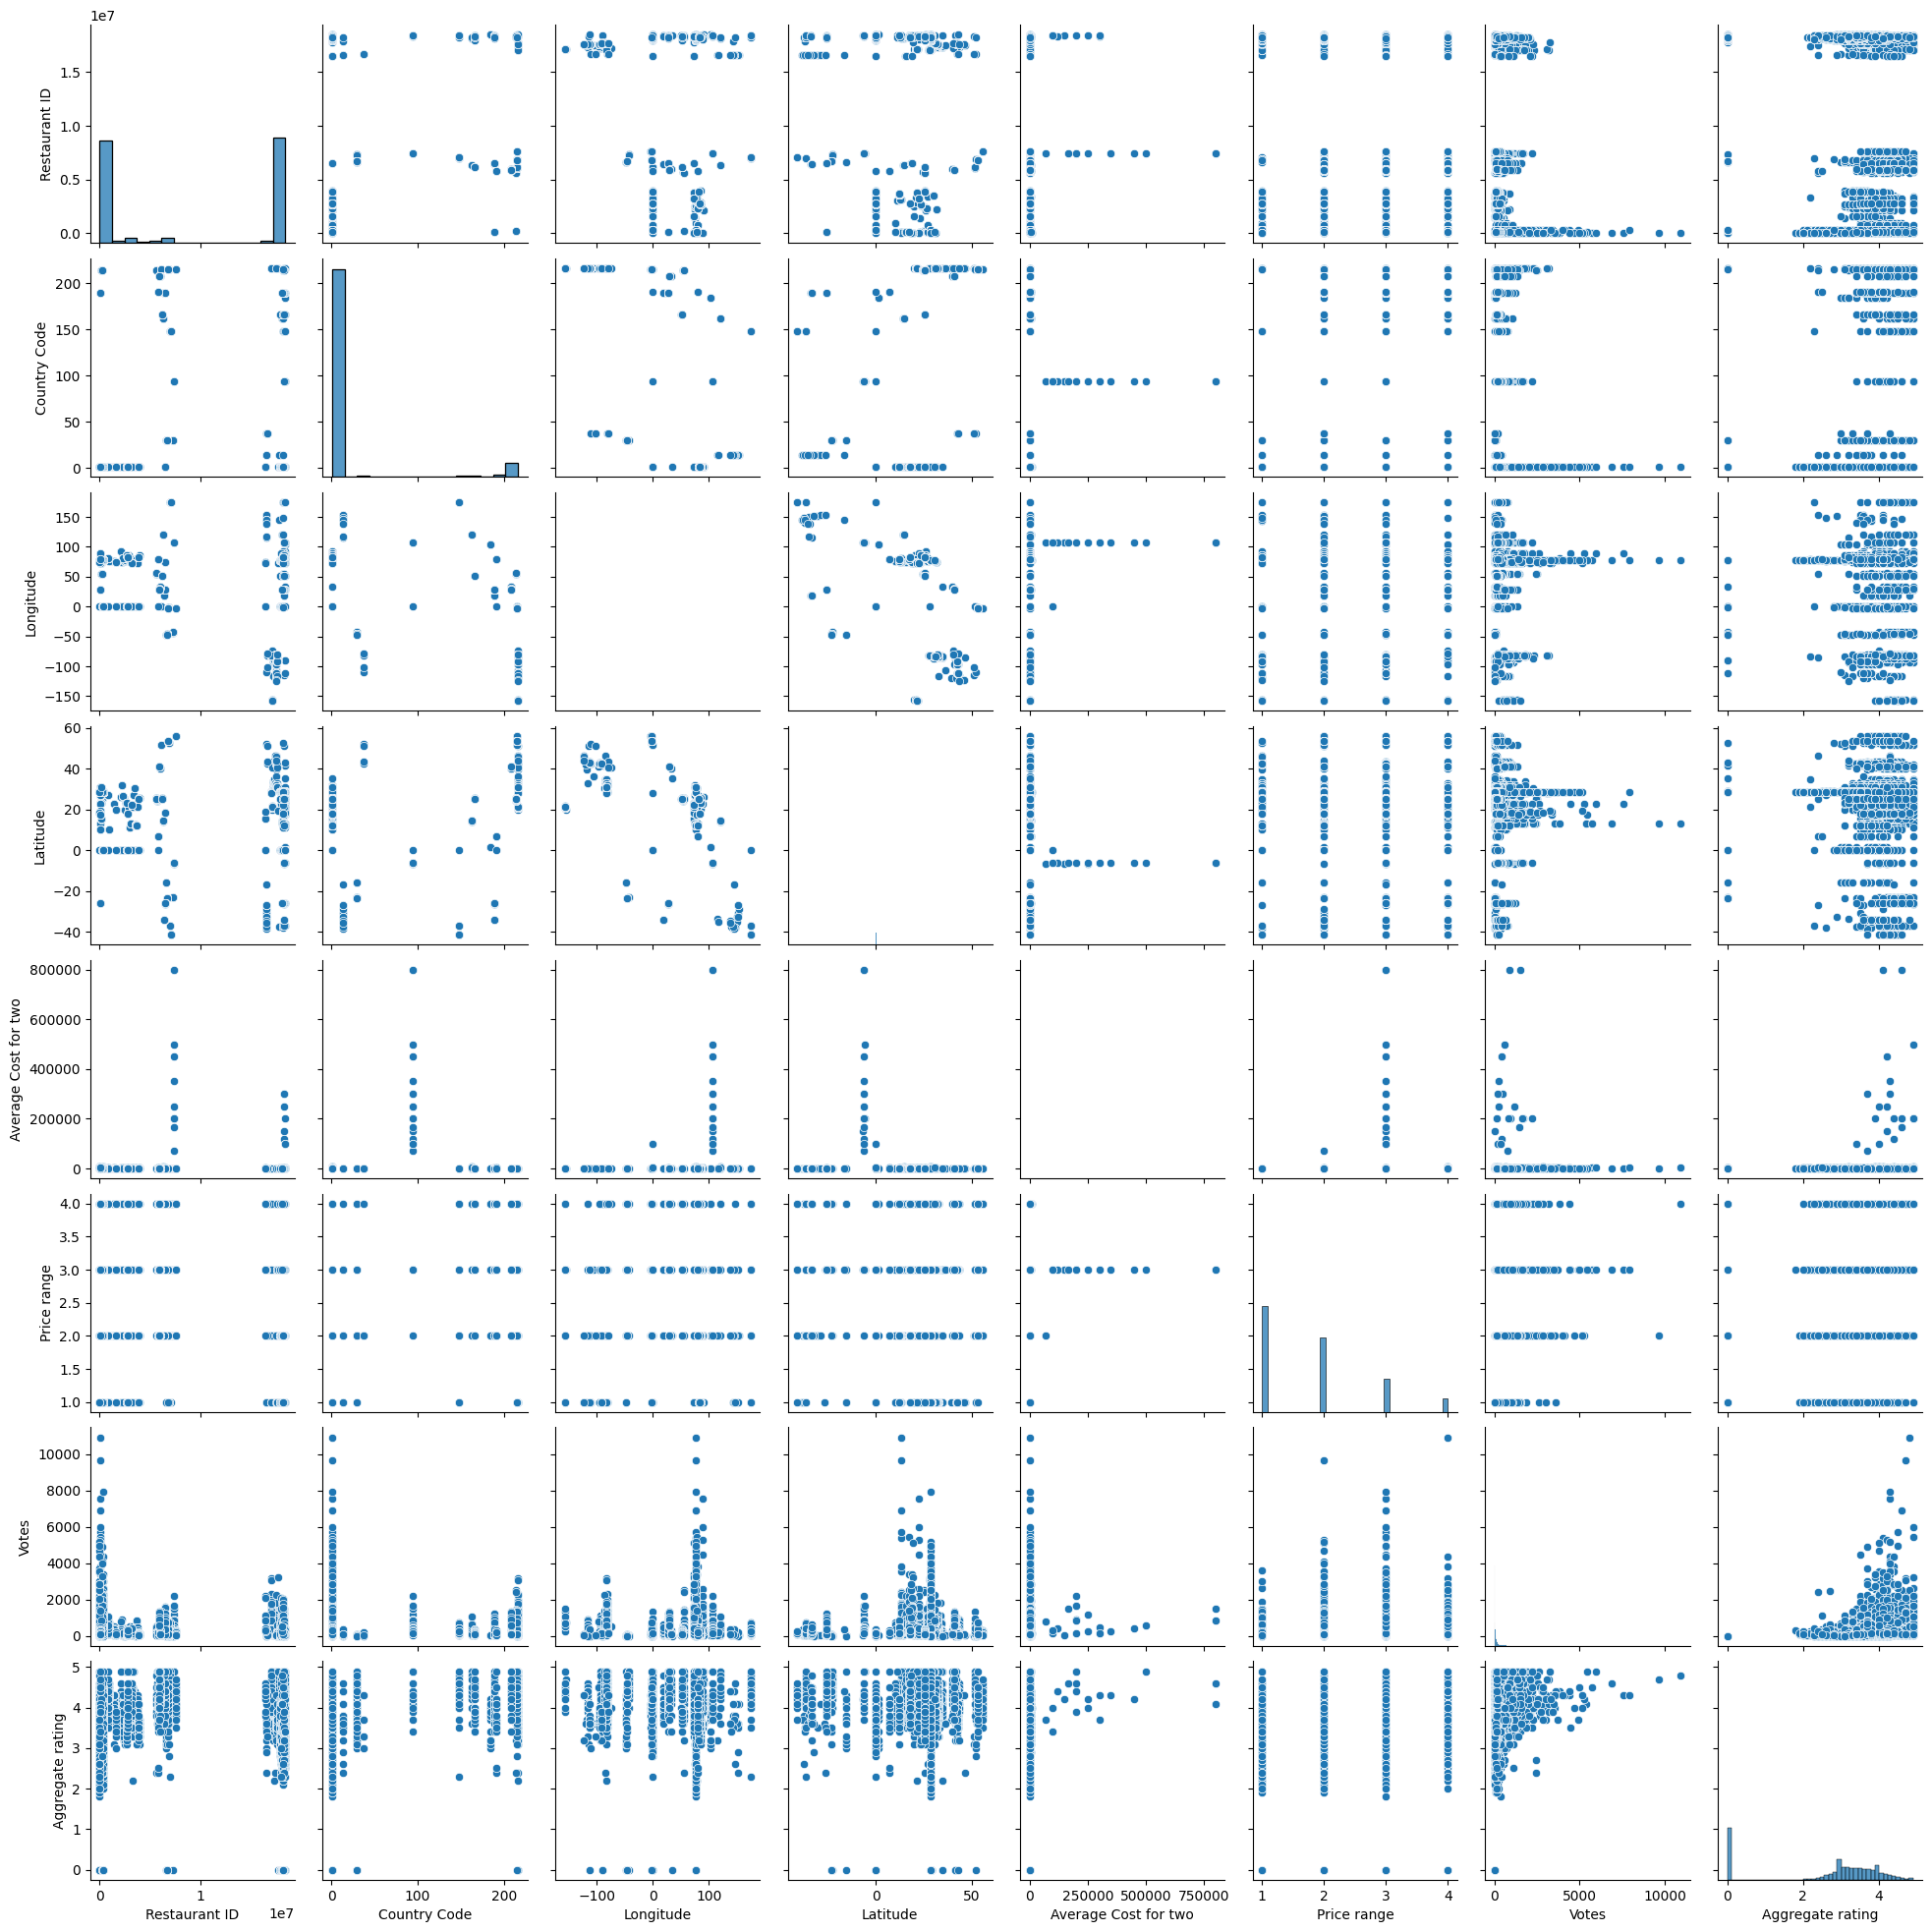

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df = df.dropna(subset=['Cuisines', 'City', 'Aggregate rating'])

plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

top_cuisines = df['Cuisines'].value_counts().head(10).index
avg_rating_cuisine = df[df['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='viridis')
plt.title('Average Rating by Top 10 Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='magma')
plt.title('Average Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Aggregate rating' in numeric_cols:
    numeric_cols.remove('Aggregate rating')
if len(numeric_cols) > 0:
    sns.pairplot(df[numeric_cols + ['Aggregate rating']])
    plt.show()
